# Polynomial Regression Implementation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#load dataset
data=pd.read_csv('claim_per_policy.csv')

In [5]:
x=data.iloc[:,:-1].values
y=data.iloc[:,-1:].values
print(type(x),type(y))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


# Build Base regression model

In [7]:
#
from sklearn.linear_model import LinearRegression
base_reg=LinearRegression()
base_reg.fit(x,y)
print("",base_reg.coef_)
print()
print("",base_reg.intercept_)

 [[601.90769231]]

 [21534.75641026]


In [8]:
#


# Polynomial based Linear Regression

In [10]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly_features=PolynomialFeatures(degree=2)
X_poly=poly_features.fit_transform(x)
#Y_poly=poly_features.fit_transform(y)

#call Linear regression and assign to poly_reg variable
poly_reg=LinearRegression()
poly_reg.fit(X_poly,y)

print('Coefficient-M:\t',poly_reg.coef_)
print()
print('Intercept-C:\t',poly_reg.intercept_)



Coefficient-M:	 [[  0.         -95.94485514   8.21002997]]

Intercept-C:	 [33918.21828172]


In [11]:
x

array([[15],
       [20],
       [25],
       [30],
       [35],
       [40],
       [45],
       [50],
       [55],
       [60],
       [65],
       [70]], dtype=int64)

In [14]:
X_poly, X_poly.shape

(array([[1.000e+00, 1.500e+01, 2.250e+02],
        [1.000e+00, 2.000e+01, 4.000e+02],
        [1.000e+00, 2.500e+01, 6.250e+02],
        [1.000e+00, 3.000e+01, 9.000e+02],
        [1.000e+00, 3.500e+01, 1.225e+03],
        [1.000e+00, 4.000e+01, 1.600e+03],
        [1.000e+00, 4.500e+01, 2.025e+03],
        [1.000e+00, 5.000e+01, 2.500e+03],
        [1.000e+00, 5.500e+01, 3.025e+03],
        [1.000e+00, 6.000e+01, 3.600e+03],
        [1.000e+00, 6.500e+01, 4.225e+03],
        [1.000e+00, 7.000e+01, 4.900e+03]]),
 (12, 3))

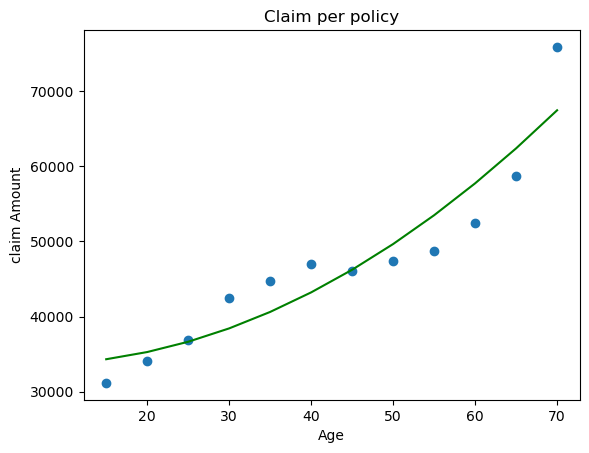

In [15]:
#
plt.scatter(x,y)
plt.plot(x,poly_reg.predict(X_poly),color='green')
plt.title('Claim per Policy-polynomail based regression')
plt.xlabel('Age')
plt.ylabel('claim Amount')
plt.show()

Coefficient-M:	 [[ 0.00000000e+00 -3.41993985e+03  2.01152658e+02 -3.84457571e+00
   1.99421971e-02  7.14358721e-05]]

Intercept-C:	 [49119.50741093]


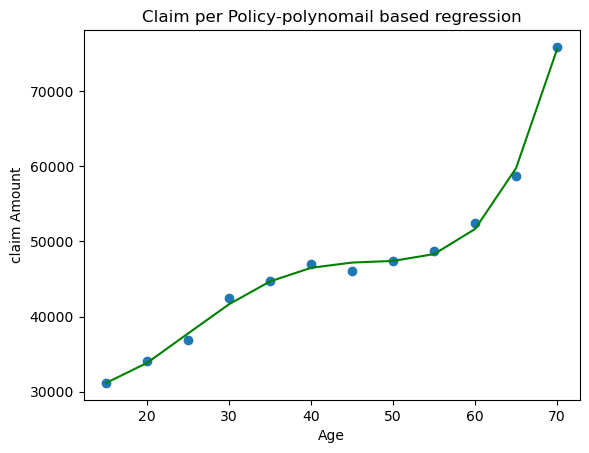

In [26]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly_features=PolynomialFeatures(degree=5)
X_poly=poly_features.fit_transform(x)
#Y_poly=poly_features.fit_transform(y)

#call Linear regression and assign to poly_reg variable
poly_reg=LinearRegression()
poly_reg.fit(X_poly,y)

print('Coefficient-M:\t',poly_reg.coef_)
print()
print('Intercept-C:\t',poly_reg.intercept_)


plt.scatter(x,y)
plt.plot(x,poly_reg.predict(X_poly),color='green')
plt.title('Claim per Policy-polynomail based regression')
plt.xlabel('Age')
plt.ylabel('claim Amount')
plt.show()

# Predict with Polynomial Regression for Any Age

In [32]:
poly_pred=poly_reg.predict(poly_features.fit_transform(np.array([[int(input('Age p1!'))]])))
print()
print('Predicted claim amount:\t',poly_pred)

Age p1!15

Predicted claim amount:	 [[31168.13490965]]


In [35]:
base_pred=base_reg.predict(np.array([[int(input('Age p1! '))]]))
print()
print('Predicted claim amount by base regression:\t',base_pred)

Age p1! 15

Predicted claim amount by base regression:	 [[30563.37179487]]


In [36]:
data

,Age,Claim per policy
0,15,31177
1,20,34086
2,25,36867
3,30,42452
4,35,44681
5,40,46986
6,45,46033
7,50,47341
8,55,48762
9,60,52408


In [37]:
print("base_pred error",y[0]-base_pred)
print()
print("poly_pred error",y[0]-poly_pred)

base_pred error [[613.62820513]]

poly_pred error [[8.86509035]]
